Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


## Collaborators
* Collaborator 1: Pol Torné Charlez 
* Collaborator 2: Damari Alicia Paredes García
* Collaborator 3: Macabe John Daley

# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font>

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [10]:
%pip install nbimporter
%pip install nbformat
%pip install seaborn

In [14]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks.
import nbimporter
import pandas as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib              as mpl
import seaborn                 as sns
from itertools import *
from collections import Counter, OrderedDict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# This statement allow to display plots without asking to
%matplotlib inline

# you can also add the following line for making pretty-loking plots
plt.style.use('ggplot')


In [5]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

We import the functions from the notebooks of all the collaborators.

In [20]:
# Functions of collaborator 1
from Collaborator_1 import renamevars
from Collaborator_1 import calculate_correlation
from Collaborator_1 import plot_scatter
from Collaborator_1 import visualize_high_correlation

# Functions of collaborator 2
from Collaborator_2 import scat_plt as scat_plt
from Collaborator_2 import normalize as normalize

# Functions of collaborator 3
from Collaborator_3 import group_and_average

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work.
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [21]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data',
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

First of all, we rename the variables of the given dataframe using the function *renamevars(df,dict_names)* to use simple names for the rest of the analysis.

In [22]:
dict_names = {'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'MDVP:Fo(Hz)':'avFF',
              'Shimmer:DDA':'dda'}

In [23]:
# your code here
renamed_df = renamevars(df, dict_names)
renamed_df.head(10)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


Also, we create two new columns using the variable _name_, one for subject id and the other for the number of trial.

In [25]:
split_name = df.name.str.split('_',expand=True) # separate the string into segments using the character '_' as separator
# It would create one column for each segment

print('spliting the values in "name" yields the following data frame. The first two columns are useless')
print(split_name.head()) # note that the first two columns are not relevant for our analisys so we can drop them
split_name.drop(split_name.columns[[0, 1]], axis =1, inplace = True) # drop the first two columns and modify the dataframe
split_name.columns = ['subject_id', 'trial'] # addnames to the respective columns for facilitating interpretation
split_name

spliting the values in "name" yields the following data frame. The first two columns are useless
      0    1    2  3
0  phon  R01  S01  1
1  phon  R01  S01  2
2  phon  R01  S01  3
3  phon  R01  S01  4
4  phon  R01  S01  5


,subject_id,trial
0,S01,1
1,S01,2
2,S01,3
3,S01,4
4,S01,5
...,...,...
190,S50,2
191,S50,3
192,S50,4
193,S50,5


We add the new two columns to the dataframe and also remove the orginal _name_. In addition we place the two new columns in the first positions in the dataframe.

In [26]:
# add new columns
df = df.assign(Subject_id=split_name['subject_id'],
               Trial=split_name['trial'])
# change position of columns
column_to_move = df.pop("Subject_id")
# insert column with insert(location, column_name, column_value)
df.insert(0, "Subject_id", column_to_move)
column_to_move = df.pop("Trial")
# insert column with insert(location, column_name, column_value)
df.insert(1, "Trial", column_to_move)
df = df.drop(columns=["name"])
df.head(5)

,Subject_id,Trial,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


The main objective is to obtain a cleaner dataframe, to do that we will try to identify the correlated variables. We will apply the _scat_plt()_ function to observe their behavior.

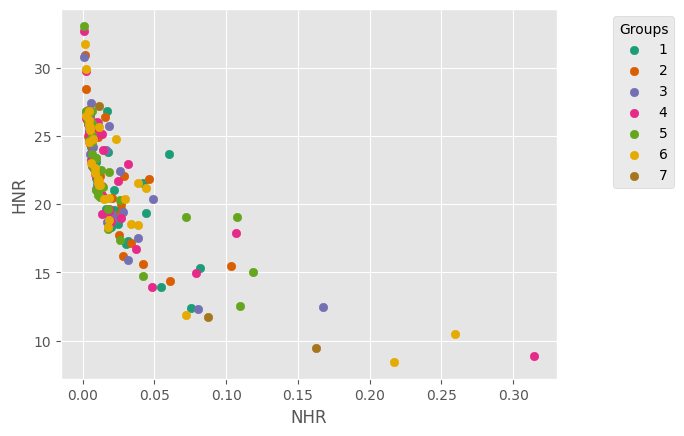

In [27]:
scat_plt(df['NHR'], df['HNR'], df['Trial']) # exemple to see if works, remove for final deliver

### 2. Basic EDA based on plots and descriptive statistics

In this section we will make some EDA (Exploratory Data Analysis) of the cleaner dataframe. We will plot variables and make descriptive statistics.

1. Number of observations

In [15]:
print('Number of observations: ',dff.shape[0])

Number of observations:  195


2. Are there differences between controls and patients?

In [16]:
healthy = dff[dff['status']=='0']
pd = dff[dff['status']=='1']
print('Number of healthy: ',healthy.shape[0])
print('Number of patients: ',pd.shape[0])

Number of healthy:  48
Number of patients:  147


Below, boxplots for each variable against the status of the subjects are provided. Differences can be found in each scenario, although not in a bold way. 

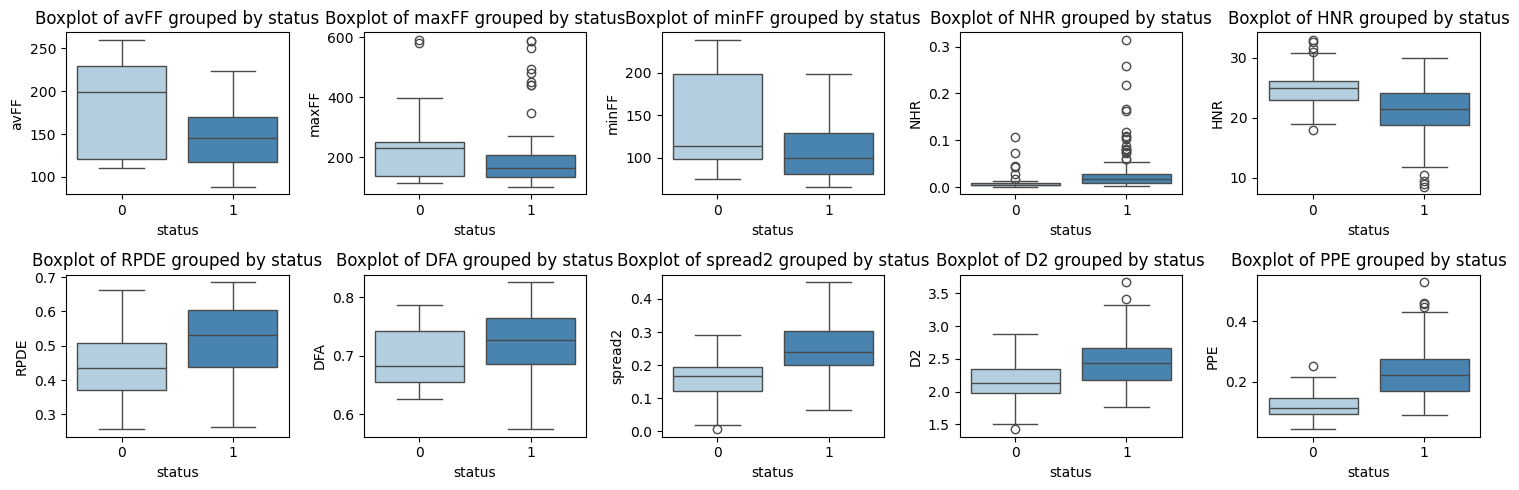

In [99]:
dfff = dff.drop(columns = ['name']) # Removing the name column
status_column = dfff.pop('status')  # Rearrange the status column
dfff.insert(0, 'status', status_column)

num_columns = int((dfff.shape[1]-1) / 2)  # Minus 1 to not count the 'status' column
# Create the image subplots
fig, axes = plt.subplots(nrows=2, ncols=num_columns, figsize=(15, 5))

my_pal = {"0": "firebrick", "1": "burlywood"}

# Loop through each column (excluding 'status') and create a boxplot on each subplot
for i, column in enumerate(dfff.columns[1:]):
    sns.boxplot(x='status', y=column, data=dfff, ax=axes[i // num_columns, i % num_columns], palette='Blues', legend=False, hue='status')
    axes[i // num_columns, i % num_columns].set_title(f'Boxplot of {column} grouped by status')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

To study more in depth the possible differences between healthy and unhealthy groups, let's do a Principal Components Analysis. First, data is going to be standardized, and then PCA will be executed to obtain a new dimensional space from which to check the variance explained by the space-confirming (principal) components.

In [33]:
dfff.head()

,status,avFF,maxFF,minFF,NHR,HNR,RPDE,DFA,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.02211,21.033,0.414783,0.815285,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.01929,19.085,0.458359,0.819521,0.335590,2.486855,0.368674
2,1,116.682,131.111,111.555,0.01309,20.651,0.429895,0.825288,0.311173,2.342259,0.332634
3,1,116.676,137.871,111.366,0.01353,20.644,0.434969,0.819235,0.334147,2.405554,0.368975
4,1,116.014,141.781,110.655,0.01767,19.649,0.417356,0.823484,0.234513,2.332180,0.410335


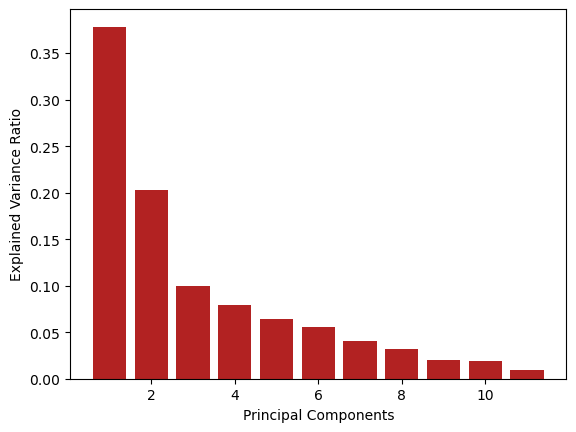

In [85]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfff)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='firebrick')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

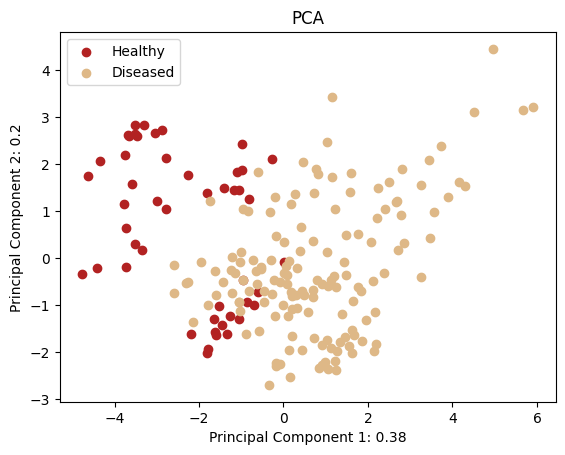

In [96]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=pca_result[:,:2], columns=['PC1', 'PC2'])
pc_df.insert(0, 'status', status_column)
pc_df['status'] = pc_df['status'].astype('category')

healthy = pc_df[pc_df['status'] == '0']
parkinson_disease = pc_df[pc_df['status'] == '1']

plt.scatter(healthy['PC1'], healthy['PC2'], label='Healthy', c='firebrick')
plt.scatter(parkinson_disease['PC1'], parkinson_disease['PC2'], label='Diseased', c='burlywood')

plt.xlabel(f'Principal Component 1: {round(explained_variance_ratio[0],2)}')
plt.ylabel(f'Principal Component 2: {round(explained_variance_ratio[1],2)}')
plt.title('PCA')
plt.legend()
plt.show()

*With all the information above, we can conclude that...*

- Total observations: 195
    - Healthy: 48
    - Diseased: 147
- Differences among groups...
    - There are some apparent differences among groups means, ranges, and standard deviations, as noticed through the boxplots.
    - The number of outliers is relatively low, apart from the NHR case, as can be also appreciated in the boxplots. Since these don't seem to have a meaningful impact on the differentiation of the groups, no actions will be required against them.
    - Thanks to the PCA, we see that a discretization between the two groups is possible, there exists an overall intrinsic difference among them, most noticebly with the first principal component or x axis. On the other hand, the second principal componet doesn't provide very evident differences among the two groups, although it could be argued that a slight separation is found, with the healthy group on the top and the diseased one in the bottom of the axis.

----------------------------------------------------------------

### 3. Aggregating and transforming variables in the dataset

In [ ]:
# your code here

### TASK 3

##### HEADING
*Using the function group_and_average, create a dataframe for aggregating each variable of the cleaned_dataframe across trials for each subject. The resulting dataframe should consist on 32 observations, one for each subject.*

In [ ]:
averaged_df = group_and_average(df=cleaned_df, gv='Subject_ID')

### 4. Differentiating between controls (healthy subjects) and patients

In [ ]:
# your code here